# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Overall Observations from Below Analysis
----
* The Northern Hemisphere has much more dramatic weather conditions than the Southern Hemisphere

* As expected, temperatures are the highest around the eqautor and get cooler as you head toward the polar regions. However, interestingly, humidity does not follow this same pattern, remaining relatively normalized across the Southern Hemisphere but increasing significantly as you get closer to the North Pole.

* The further South you go, the less cloudy it gets (aka given the analysis around humidity, would be interesting to do additional analysis around precipitation and see if that helps draw correlations between lack of cloudiness and lack of humidity in southernmost regions).

In [28]:
# Dependencies and Setup
import import_ipynb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [6]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
        

Beginning Data Retrieval 
-----------------------------
City not found. Skipping...
Processing Record 6 of Set 12 : rikitea
Processing Record 7 of Set 12 : la rioja
Processing Record 8 of Set 12 : punta arenas
Processing Record 9 of Set 12 : praia da vitoria
City not found. Skipping...
City not found. Skipping...
Processing Record 10 of Set 12 : cabo san lucas
Processing Record 11 of Set 12 : mar del plata
Processing Record 12 of Set 12 : kaitangata
Processing Record 13 of Set 12 : albany
City not found. Skipping...
Processing Record 14 of Set 12 : shakawe
Processing Record 15 of Set 12 : te anau
Processing Record 16 of Set 12 : busselton
Processing Record 17 of Set 12 : porto novo
Processing Record 18 of Set 12 : souillac
Processing Record 19 of Set 12 : faya
Processing Record 20 of Set 12 : shonguy
Processing Record 21 of Set 12 : goderich
Processing Record 22 of Set 12 : port lincoln
Processing Record 23 of Set 12 : teya
City not found. Skipping...
Processing Record 24 of Set 12 : p

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create DF from retrieved data
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [8]:
# Count data
weather_dict.count()

City          1132
Cloudiness    1132
Country       1132
Date          1132
Humidity      1132
Lat           1132
Lng           1132
Max Temp      1132
Wind Speed    1132
dtype: int64

In [9]:
#Display DF
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,77,PF,1604262409,86,-23.12,-134.97,74.55,22.30
1,La Rioja,0,ES,1604262550,87,42.25,-2.50,60.01,7.43
2,Punta Arenas,75,CL,1604262550,76,-53.15,-70.92,51.80,14.99
3,Praia da Vitória,75,PT,1604262550,100,38.73,-27.07,64.00,18.21
4,Cabo San Lucas,43,MX,1604262524,38,22.89,-109.91,90.00,4.00
...,...,...,...,...,...,...,...,...,...
1127,Salym,98,RU,1604262572,97,60.06,71.48,29.95,8.52
1128,Springfield,1,US,1604262303,27,37.22,-93.30,55.00,13.87
1129,North Vanlaiphai,73,IN,1604262572,100,23.13,93.07,58.03,1.48
1130,Labuhan,69,ID,1604262572,83,-6.88,112.21,77.70,4.47


In [11]:
#Export to CSV
weather_dict.to_csv("output_data/cities2.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

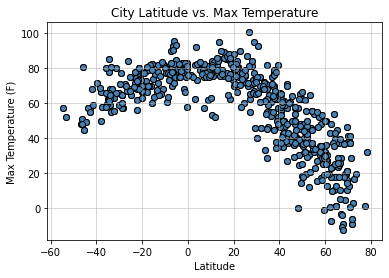

In [20]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City_Lat_vs_Max_Temp.png")

### Analysis
* The Southern Hemisphere is warmer than the Northern Hemisphere 
* The highest temperatures sit between about -10 latitude and 30 latitude 

## Latitude vs. Humidity Plot

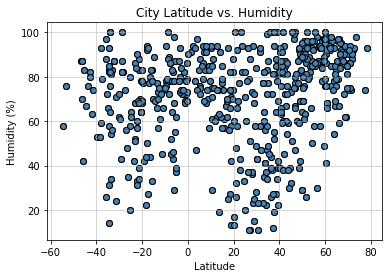

In [21]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City_Lat_vs_Humidity.png")

### Analysis
* The Northern Hemisphere tends to be more humid than the Southern Hemisphere

## Latitude vs. Cloudiness Plot

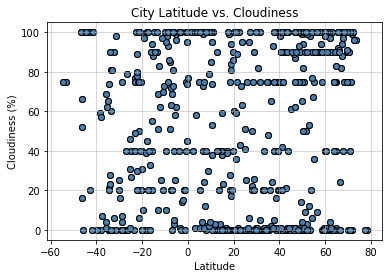

In [23]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City_Lat_vs_Cloudiness.png")

### Analysis
* Cloudiness does not seem to vary significantly by hemisphere

## Latitude vs. Wind Speed Plot

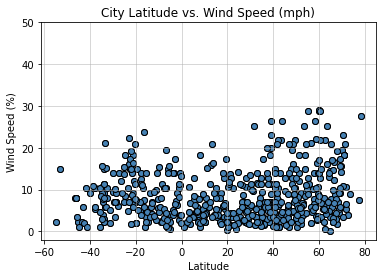

In [24]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Wind Speed (mph)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City_Lat_vs_Wind_Speed_(mph).png")

### Analysis
* Wind speeds are slightly higher in the Northern Hemisphere

## Linear Regressions

In [29]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [30]:
# Define function for creating linear agression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

##  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.83


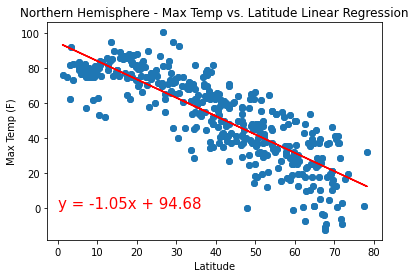

In [31]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/NH_Max_Temp_vs_Lat_LR.png")

### Analysis
* There is a strong negative correlation between latitude and temperature - as you move further from the equator, the high temperatures decrease

##  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.67


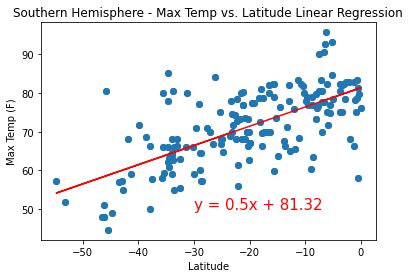

In [32]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/SH_Max_Temp_vs_Lat_LR.png")


### Analysis
* There is a strong positive correlation between latitude and temp in the Southern Hemisphere - as you get closer to the equator, temperatures rise

##  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.27


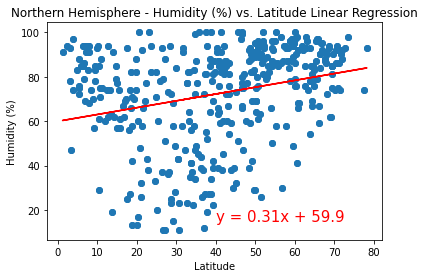

In [33]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/NH_Humidity(%)_vs_Lat_LR.png")

### Analysis
* There is a moderate positive correlation, showing that as you get closer to the North Pole, the humidity increases

##  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.05


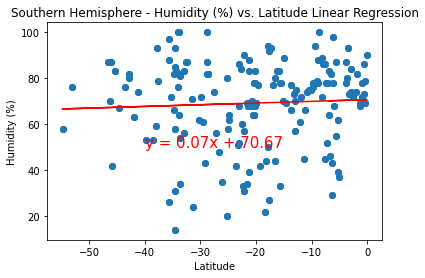

In [34]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/SH_Humidity(%)_vs_Lat_LR.png")

### Analysis
* There is a very slight positive correlation, showing that as you get closer to the equator in the Southern Hemisphere, the humidity goes up. However, largerly humidity in the Southern Hemisphere does not appear to be as affected by latitude as it is in the Northern Hemisphere.

##  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.19


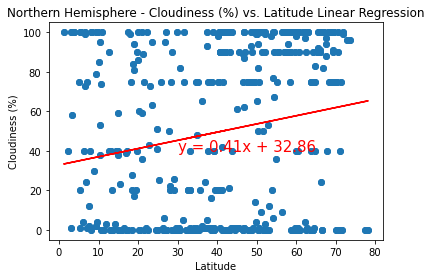

In [35]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/NH_Cloudiness(%)_vs_Lat_LR.png")

### Analysis
* There is a positive correlation between latitude and cloudiness in the Northern Hemisphere, showing that as you go further north, it gets more cloudy.

##  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.19


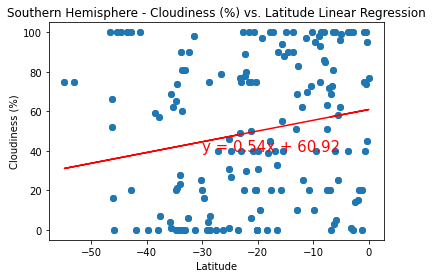

In [36]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/SH_Cloudiness(%)_vs_Lat_LR.png")

### Analysis
* There is a positive correlation between latitude and cloudiness in the Southern Hemisphere, indicating that as you move closer to the equator, cloudiness increases.

##  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.27


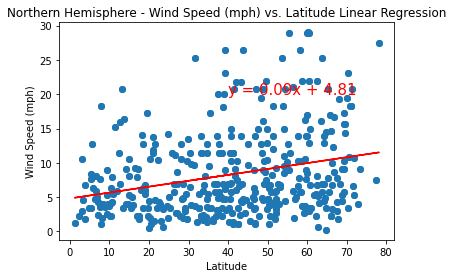

In [37]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/NH_Wind_Speed_vs_Lat_LR.png")

### Analysis
* There is a positive correlation between wind speend and latitude in the Northern Hemisphere, indicating an increase in windiness as you get closer to the North Pole.

##  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.02


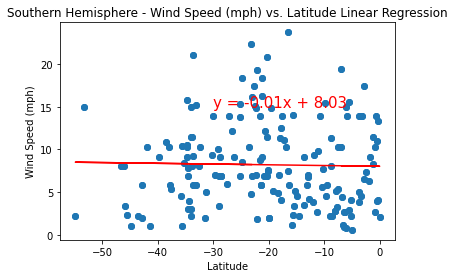

In [38]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/SH_Wind_Speed_vs_Lat_LR.png")

### Analysis
* There is a very slight negative correlation between wind speed and latitude in the Southern Hemisphere, indicating that as you get closer to the equator, you may experience higher winds, but broadly there isn't significant differences versus what might be expereienced closer to the South Pole.